<font size = 6> Определение перспективного тарифа для телеком-компании</font>

## Описание проекта

Клиентам предлагают два тарифных плана: «Смарт» и «Ультра».  
Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Необходимо провести предварительный анализ тарифов на небольшой выборке клиентов. В распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год.  
Необходимо проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

Тариф «Смарт»
* Ежемесячная плата: 550 рублей
* Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
* Стоимость услуг сверх тарифного пакета:
* минута разговора: 3 рубля
* сообщение: 3 рубля
* 1 Гб интернет-трафика: 200 рублей

Тариф «Ультра»
* Ежемесячная плата: 1950 рублей
* Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
* Стоимость услуг сверх тарифного пакета:
* минута разговора: 1 рубль
* сообщение: 1 рубль
* 1 Гб интернет-трафика: 150 рублей

## Получение данных

In [1]:
# Импорт необходимых библиотек
import pandas as pd
from datetime import datetime 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from math import ceil
from tqdm import tqdm

In [2]:
# создадим список с именами тадлиц для чтения
files_list = ['calls', 'internet', 'messages', 'tariffs', 'users']

# ссылка для файлов на Яндексе
link_to_file = 'https://code.s3.yandex.net/datasets/'

In [3]:
# Читаем данные и выводим название, info и первые 2 строки
for file_name in files_list:
    
    try:
        globals()[file_name] = pd.read_csv(file_name + ".csv")
    except FileNotFoundError:
        globals()[file_name] = pd.read_csv(link_to_file + file_name + ".csv")
    
    print(50*'>', file_name)
    globals()[file_name].info()
    display(globals()[file_name].head(2))
    print()

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> calls
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.0,1000
1,1000_1,2018-08-17,0.0,1000



>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> internet
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000



>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> messages
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000



>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> tariffs
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra



>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> users
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart


In [4]:
# Посмотрим на первый столбец таблицы internet
internet['Unnamed: 0']

0              0
1              1
2              2
3              3
4              4
           ...  
149391    149391
149392    149392
149393    149393
149394    149394
149395    149395
Name: Unnamed: 0, Length: 149396, dtype: int64

In [5]:
# задвоение индексов. удалим столбец
internet = internet.drop('Unnamed: 0', axis=1)
# проверка
internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


**Вывод** Получены данные из 5 файлов. В 'users' имеются пропуски. Данные в некоторых столбцах требуют изменения типа. На следующем этапе проведём преобразование типов данных, проверку на дубликаты и корректность данных.


## Подготовка данных

Меняем типы данных.

In [6]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
calls['duration'] = pd.to_numeric(calls['duration'])
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


In [7]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       149396 non-null  float64       
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.6+ MB


In [8]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


In [9]:
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


In [10]:
# проверим число дубликатов в данных
for df in files_list:
    print(f'Число дубликатов в таблице {df:<10} {globals()[df].duplicated().sum()}')

Число дубликатов в таблице calls      0
Число дубликатов в таблице internet   0
Число дубликатов в таблице messages   0
Число дубликатов в таблице tariffs    0
Число дубликатов в таблице users      0


In [11]:
# Посмотрим на минимальные и максимальные значения числовых пременных
for file_name in files_list:
    print(50*'>', file_name)
    display(globals()[file_name].describe().style.format('{:.2f}'))

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> calls


,duration,user_id
count,202607.00,202607.00
mean,6.76,1253.94
std,5.84,144.72
min,0.00,1000.00
25%,1.30,1126.00
50%,6.00,1260.00
75%,10.70,1379.00
max,38.00,1499.00


>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> internet


,mb_used,user_id
count,149396.00,149396.00
mean,370.19,1252.10
std,278.30,144.05
min,0.00,1000.00
25%,138.19,1130.00
50%,348.01,1251.00
75%,559.55,1380.00
max,1724.83,1499.00


>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> messages


,user_id
count,123036.00
mean,1256.99
std,143.52
min,1000.00
25%,1134.00
50%,1271.00
75%,1381.00
max,1499.00


>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> tariffs


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,2.00,2.00,2.00,2.00,2.00,2.00,2.00
mean,525.00,23040.00,1750.00,1250.00,175.00,2.00,2.00
std,671.75,10861.16,1767.77,989.95,35.36,1.41,1.41
min,50.00,15360.00,500.00,550.00,150.00,1.00,1.00
25%,287.50,19200.00,1125.00,900.00,162.50,1.50,1.50
50%,525.00,23040.00,1750.00,1250.00,175.00,2.00,2.00
75%,762.50,26880.00,2375.00,1600.00,187.50,2.50,2.50
max,1000.00,30720.00,3000.00,1950.00,200.00,3.00,3.00


>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> users


,user_id,age
count,500.00,500.00
mean,1249.50,46.59
std,144.48,16.67
min,1000.00,18.00
25%,1124.75,32.00
50%,1249.50,46.00
75%,1374.25,62.00
max,1499.00,75.00


In [12]:
# посмотрим на даты (минимальную, максимальную, число уникальных)
print(calls['call_date'].min(), calls['call_date'].max(), calls['call_date'].nunique())
print(internet['session_date'].min(), internet['session_date'].max(), internet['session_date'].nunique())
print(messages['message_date'].min(), messages['message_date'].max(), messages['message_date'].nunique())
print(users['churn_date'].min(), users['churn_date'].max(), users['churn_date'].nunique())
print(users['reg_date'].min(), users['reg_date'].max(), users['reg_date'].nunique())

2018-01-01 00:00:00 2018-12-31 00:00:00 365
2018-01-01 00:00:00 2018-12-31 00:00:00 365
2018-01-02 00:00:00 2018-12-31 00:00:00 364
2018-08-17 00:00:00 2018-12-30 00:00:00 33
2018-01-01 00:00:00 2018-12-31 00:00:00 270


Тат как по условию исследования, представлены данные за 1 календарный год, создадим для каждого DF дополнительынй столбец с номером месяца события.

In [13]:
calls['month'] = calls['call_date'].dt.month
internet['month'] = internet['session_date'].dt.month
messages['month'] = messages['message_date'].dt.month
users['reg_month'] = users['reg_date'].dt.month
users['churn_month'] = users['churn_date'].dt.month

In [14]:
# Посмотрим на число клиентов покинувших компанию
users.loc[users['churn_date'].isna() == False]['user_id'].count()

38

In [15]:
# Распределение по месяцам
users.loc[users['churn_date'].isna() == False].groupby('churn_month').agg({'user_id':'count'})

,user_id
churn_month,
8.0,2
9.0,3
10.0,9
11.0,8
12.0,16


38 клиентов отказалось от услуг компании, почти половина в дукабре. Отток клиентов незначителен и не окажет влияние на исследование.

По условиям тарифа, продолжительнолсть каждого звонка округляется в большую сторону до цехых минут.  
"*Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.*"

In [16]:
calls['duration'] = np.ceil(calls['duration']).astype('int')
calls.info()
calls.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  int32         
 3   user_id    202607 non-null  int64         
 4   month      202607 non-null  int64         
dtypes: datetime64[ns](1), int32(1), int64(2), object(1)
memory usage: 7.0+ MB


,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12


**Выводы** Необходимые изменения типов произведены. Дубликаты проверены. Сопоставление среднего и медианных значений для числовых переменных даёт основание полагать, что значительные аномалии в данных отсутствуют. Временной интервал данных 2018 год. 38 клиентов перестали пользоваться услугами связи, что не отразится на результатах исследования.

### Количество сделанных звонков и израсходованных минут разговора по месяцам

Группируем по клиенту и месяцу. В качестве агрегирующих функций -  подсчет числа звонков и сумма израсходаванных минут. 

In [17]:
user_cal = (
    calls.groupby(['user_id', 'month'])
    .agg({'id':'count', 'duration':'sum'})
    .reset_index()
    .rename(columns={'id': 'cal_no', 'duration': 'cal_dur'})
)
user_cal

,user_id,month,cal_no,cal_dur
0,1000,5,22,159
1,1000,6,43,172
2,1000,7,47,340
3,1000,8,52,408
4,1000,9,58,466
...,...,...,...,...
3169,1498,10,41,247
3170,1499,9,9,70
3171,1499,10,68,449
3172,1499,11,74,612


Посмотрим на динамику

In [18]:
tm = (calls.groupby('month')
    .agg({'user_id':'nunique', 'id':'count', 'duration':'sum'})
    .reset_index()
    .rename(columns={'user_id': 'user_no', 'id': 'calls_no'}))

# добавим данные
# среднее число звонков на одного активного клиента
tm['calls_per_user']    = round(tm['calls_no'] / tm['user_no'], 2) 
# средняя продолжительность звонков на одного активного клиента
tm['duration_per_user'] = round(tm['duration'] / tm['user_no'], 2) 
# расчитаем прирост активных клиентов относительно предыдущего месяца
tm['delta'] = tm['user_no']
tm['delta'] = tm.delta.shift(1, fill_value=0)
tm['delta'] = tm['user_no'] - tm['delta']
tm

,month,user_no,calls_no,duration,calls_per_user,duration_per_user,delta
0,1,43,1476,10784,34.33,250.79,43
1,2,82,3328,24455,40.59,298.23,39
2,3,114,6687,48151,58.66,422.38,32
3,4,165,9272,66310,56.19,401.88,51
4,5,205,12647,88810,61.69,433.22,40
5,6,244,14716,105180,60.31,431.07,39
6,7,289,18298,131746,63.31,455.87,45
7,8,337,21488,153698,63.76,456.08,48
8,9,370,24061,173475,65.03,468.85,33
9,10,411,27146,193928,66.05,471.84,41


In [19]:
# Характеристики прироста новых пользователей услуги
tm['delta'].describe().map('{:.4f}'.format)

count    12.0000
mean     39.1667
std       7.2090
min      26.0000
25%      33.0000
50%      39.5000
75%      43.5000
max      51.0000
Name: delta, dtype: object

Визуализируем

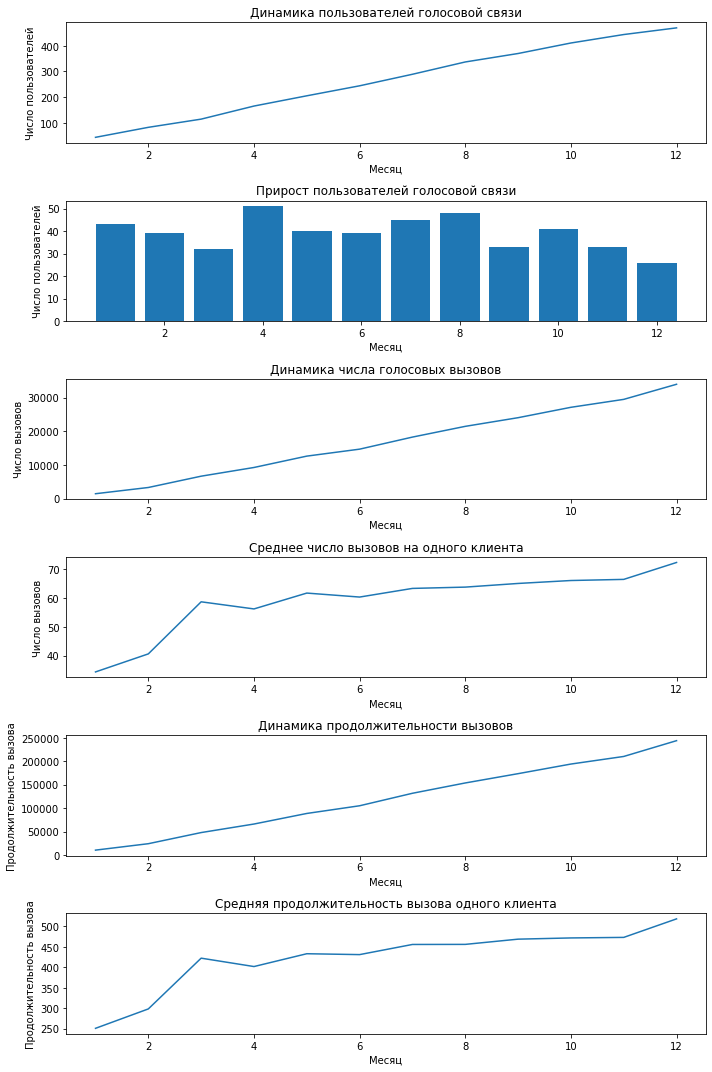

In [20]:
fig1, ax1 = plt.subplots(nrows=6, ncols=1, figsize=(10,15))

ax1[0].set_title(f'Динамика пользователей голосовой связи')
ax1[0].plot(tm['month'], tm['user_no'])
ax1[0].set_xlabel("Месяц", fontsize=10)
ax1[0].set_ylabel("Число пользователей", fontsize=10)

ax1[1].set_title(f'Прирост пользователей голосовой связи')
ax1[1].bar(tm['month'], tm['delta'])
ax1[1].set_xlabel("Месяц", fontsize=10)
ax1[1].set_ylabel("Число пользователей", fontsize=10)

ax1[2].set_title(f'Динамика числа голоcовых вызовов')
ax1[2].plot(tm['month'], tm['calls_no'])
ax1[2].set_xlabel("Месяц", fontsize=10)
ax1[2].set_ylabel("Число вызовов", fontsize=10)

ax1[3].set_title(f'Cреднее число вызовов на одного клиента')
ax1[3].plot(tm['month'], tm['calls_per_user'])
ax1[3].set_xlabel("Месяц", fontsize=10)
ax1[3].set_ylabel("Число вызовов", fontsize=10)

ax1[4].set_title(f'Динамика продолжительности вызовов')
ax1[4].plot(tm['month'], tm['duration'])
ax1[4].set_xlabel("Месяц", fontsize=10)
ax1[4].set_ylabel("Продолжительность вызова", fontsize=10)

ax1[5].set_title(f'Cредняя продолжительность вызова одного клиента')
ax1[5].plot(tm['month'], tm['duration_per_user'])
ax1[5].set_xlabel("Месяц", fontsize=10)
ax1[5].set_ylabel("Продолжительность вызова", fontsize=10)

fig1.tight_layout()


**Выводы**
- линейный рост числа пользователей услуги голосовой связи
- месячныый присрост новых пользователей услуги 26-51 человек (39.17 среднее, 39.5 медиана)
- почти линейный рост числа вызовов
- при увеличении числа пользователей, наблюдается снижение активности в апреле
- средние число вызовов и продолжительность вызовов растут

### Количество отправленных сообщений по месяцам

Группироем по клиенту и месяцу. В качестве агрегирующей функции -  подсчет числа сообщений. 

In [21]:
user_msg = (
    messages.groupby(['user_id', 'month'])['id'].count()
    .reset_index()
    .rename(columns={'id': 'msg_no'})
)
user_msg.sample(5)

,user_id,month,msg_no
483,1089,7,152
524,1096,7,100
1836,1351,11,5
2501,1464,2,13
2121,1396,4,88


Посмотрим на динамику

In [22]:
tm2 = (messages.groupby('month')
    .agg({'user_id':'nunique', 'id':'count'})
    .reset_index()
    .rename(columns={'user_id': 'user_no', 'id': 'msg_no'}))

# добавим данные
# среднее число сообщений на одного клиента
tm2['msg_per_user'] = round(tm2['msg_no'] / tm2['user_no'], 2) 
# расчитаем прирост клиентов относительно предыдущего месяца
tm2['delta'] = tm2['user_no']
tm2['delta'] = tm2.delta.shift(1, fill_value=0)
tm2['delta'] = tm2['user_no'] - tm2['delta']
tm2

,month,user_no,msg_no,msg_per_user,delta
0,1,38,924,24.32,38
1,2,66,1924,29.15,28
2,3,94,3648,38.81,28
3,4,135,5179,38.36,41
4,5,174,7298,41.94,39
5,6,209,8983,42.98,35
6,7,247,11320,45.83,38
7,8,292,13088,44.82,45
8,9,318,14759,46.41,26
9,10,357,17114,47.94,39


In [23]:
# Характеристики прироста новых пользователей услуги
tm2['delta'].describe().map('{:.4f}'.format)

count    12.0000
mean     33.6667
std       7.5116
min      21.0000
25%      27.5000
50%      36.5000
75%      39.0000
max      45.0000
Name: delta, dtype: object

Визуализируем

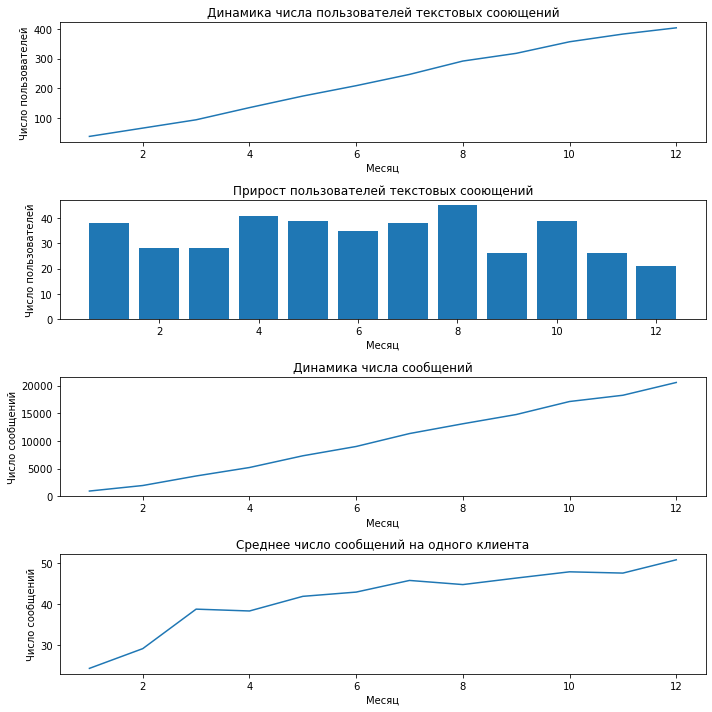

In [24]:
fig2, ax2 = plt.subplots(nrows=4, ncols=1, figsize=(10,10))

ax2[0].set_title(f'Динамика числа пользователей текстовых сооющений')
ax2[0].plot(tm2['month'], tm2['user_no'])
ax2[0].set_xlabel("Месяц", fontsize=10)
ax2[0].set_ylabel("Число пользователей", fontsize=10)

ax2[1].set_title(f'Прирост пользователей текстовых сооющений')
ax2[1].bar(tm2['month'], tm2['delta'])
ax2[1].set_xlabel("Месяц", fontsize=10)
ax2[1].set_ylabel("Число пользователей", fontsize=10)

ax2[2].set_title(f'Динамика числа сообщений')
ax2[2].plot(tm2['month'], tm2['msg_no'])
ax2[2].set_xlabel("Месяц", fontsize=10)
ax2[2].set_ylabel("Число сообщений", fontsize=10)

ax2[3].set_title(f'Среднее число сообщений на одного клиента')
ax2[3].plot(tm2['month'], tm2['msg_per_user'])
ax2[3].set_xlabel("Месяц", fontsize=10)
ax2[3].set_ylabel("Число сообщений", fontsize=10)

fig2.tight_layout()

**Выводы**
- линейный рост числа пользователей услуги текстовых сообщений
- месячныый присрост новых пользователей услуги 21-45 человек (33.67 среднее, 36,5 медиана)
- почти линейный рост числа сообщений
- при увеличении числа пользователей, наблюдается снижение активности в апреле
- среднее число сообщений растет

### Объем израсходованного интернет-трафика по месяцам

Группироем по клиенту и месяцу. В качестве агрегирующей функции - сумма израсходаванного трафика.  
После получения месячного трафика в мегабайтах, переводим его в гигабайты и округляем вверх согласно условиям тарификации.
"*«Мегалайн» всегда округляет мегабайты — до гигабайт. Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.*"

In [25]:
user_int = internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()
user_int['mb_used'] = np.ceil(user_int['mb_used']/1024).astype('int') # добавим пересчет mb>gb
user_int = user_int.rename(columns={'mb_used': 'gb_used'})
user_int

,user_id,month,gb_used
0,1000,5,3
1,1000,6,23
2,1000,7,14
3,1000,8,14
4,1000,9,15
...,...,...,...
3198,1498,10,21
3199,1499,9,2
3200,1499,10,18
3201,1499,11,18


Посмотрим на динамику

In [26]:
tm3 = (user_int.groupby('month')
    .agg({'user_id':'nunique', 'gb_used':'sum'})
    .reset_index()
    .rename(columns={'user_id': 'user_no'})
      )
# добавим данные
tm3['gb_per_user'] = round(tm3['gb_used'] / tm3['user_no'], 2) # среднее число сообщений на одного клиента
# расчитаем прирост клиентов относительно предыдущего месяца
tm3['delta'] = tm3['user_no']
tm3['delta'] = tm3.delta.shift(1, fill_value=0)
tm3['delta'] = tm3['user_no'] - tm3['delta']
tm3

,month,user_no,gb_used,gb_per_user,delta
0,1,43,416,9.67,43
1,2,80,975,12.19,37
2,3,114,1826,16.02,34
3,4,167,2459,14.72,53
4,5,207,3541,17.11,40
5,6,247,4207,17.03,40
6,7,291,5057,17.38,44
7,8,340,6030,17.74,49
8,9,374,6475,17.31,34
9,10,416,7431,17.86,42


In [27]:
# Характеристики прироста новых пользователей услуги
tm3['delta'].describe().map('{:.4f}'.format)

count    12.0000
mean     39.5833
std       7.4034
min      26.0000
25%      34.0000
50%      40.0000
75%      43.2500
max      53.0000
Name: delta, dtype: object

Визуализируем

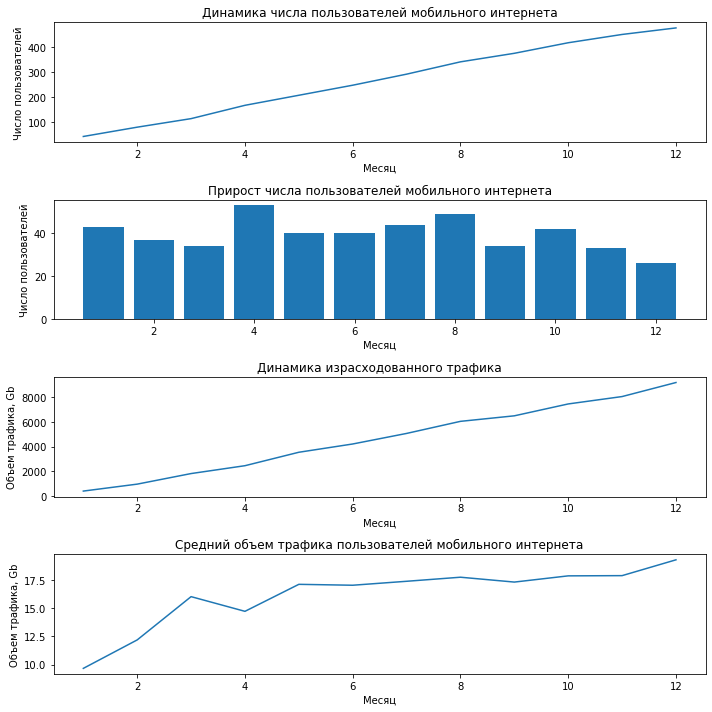

In [28]:
fig3, ax3 = plt.subplots(nrows=4, ncols=1, figsize=(10,10))

ax3[0].set_title(f'Динамика числа пользователей мобильного интернета')
ax3[0].plot(tm3['month'], tm3['user_no'])
ax3[0].set_xlabel("Месяц", fontsize=10)
ax3[0].set_ylabel("Число пользователей", fontsize=10)

ax3[1].set_title(f'Прирост числа пользователей мобильного интернета')
ax3[1].bar(tm3['month'], tm3['delta'])
ax3[1].set_xlabel("Месяц", fontsize=10)
ax3[1].set_ylabel("Число пользователей", fontsize=10)

ax3[2].set_title(f'Динамика израсходованного трафика')
ax3[2].plot(tm3['month'], tm3['gb_used'])
ax3[2].set_xlabel("Месяц", fontsize=10)
ax3[2].set_ylabel("Объем трафика, Gb", fontsize=10)

ax3[3].set_title(f'Средний объем трафика пользователей мобильного интернета')
ax3[3].plot(tm3['month'], tm3['gb_per_user'])
ax3[3].set_xlabel("Месяц", fontsize=10)
ax3[3].set_ylabel("Объем трафика, Gb", fontsize=10)

fig3.tight_layout()

**Выводы**
- линейный рост числа пользователей услуги мобильного интернета
- месячный присрост новых пользователей услуги 26-53 человек (39.58 среднее, 40 медиана)
- почти линейный рост объема трафика
- при увеличении числа пользователей, наблюдается снижение активности в апреле
- средний объем трафика растет

### Выручка с пользователя

Для расчета вуручки с пользователя объединим таблицы user_cal, user_msg, user_int по столбцам user_id и month.  
Для каждого пользователя добавим низвание тарифа.

In [29]:
user_tot = (
    user_cal.merge(user_msg, on=['user_id', 'month'], how='outer')
            .merge(user_int, on=['user_id', 'month'], how='outer')
            .merge(users.loc[:, ['user_id', 'tariff']], on='user_id', how='left')
)
user_tot.head()

,user_id,month,cal_no,cal_dur,msg_no,gb_used,tariff
0,1000,5,22.0,159.0,22.0,3.0,ultra
1,1000,6,43.0,172.0,60.0,23.0,ultra
2,1000,7,47.0,340.0,75.0,14.0,ultra
3,1000,8,52.0,408.0,81.0,14.0,ultra
4,1000,9,58.0,466.0,57.0,15.0,ultra


Создадим функцию расчета месячной стоимости услуг связи для каждого клиента/месяца (одна строка).  
Каждую тарифицируемую услугу будем проверять на превышение включенного лимита.

In [30]:
def monthly_payment(row):
    tariff = row['tariff']
    tm = tariffs.query('tariff_name == @tariff').reset_index()
    payment = tm.loc[0, 'rub_monthly_fee']
    if row['msg_no'] > tm.loc[0, 'messages_included']: 
        payment += (row['msg_no'] - tm.loc[0, 'messages_included']) * tm.loc[0, 'rub_per_message']
    if row['gb_used'] > tm.loc[0, 'mb_per_month_included'] / 1024:  
        payment += (row['gb_used'] - tm.loc[0, 'mb_per_month_included'] / 1024) * tm.loc[0, 'rub_per_gb']
    if row['cal_dur'] > tm.loc[0, 'minutes_included']: 
        payment += (row['cal_dur'] - tm.loc[0, 'minutes_included']) * tm.loc[0, 'rub_per_minute']
    row['month_payment'] = payment  
    return row

In [31]:
# Применим функцию к DF, используем tqdm для визуализации процесса
tqdm.pandas()
user_tot = user_tot.progress_apply(monthly_payment, axis=1)
user_tot = user_tot.fillna(0)
user_tot.head()

100%|██████████████████████████████████████| 3214/3214 [00:41<00:00, 77.86it/s]


,user_id,month,cal_no,cal_dur,msg_no,gb_used,tariff,month_payment
0,1000,5,22.0,159.0,22.0,3.0,ultra,1950.0
1,1000,6,43.0,172.0,60.0,23.0,ultra,1950.0
2,1000,7,47.0,340.0,75.0,14.0,ultra,1950.0
3,1000,8,52.0,408.0,81.0,14.0,ultra,1950.0
4,1000,9,58.0,466.0,57.0,15.0,ultra,1950.0


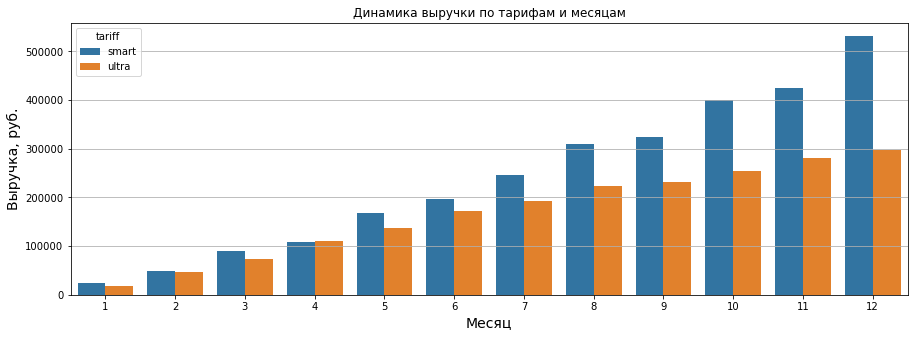

In [32]:
# Выручка по тарифам и месяцам
# user_tot.groupby('month').agg({'month_payment':'sum'}).reset_index()
plt.figure(figsize=(15, 5))
sns.barplot(x='month', 
            y='month_payment',
            data = user_tot.groupby(['month', 'tariff']).agg({'month_payment':'sum'}).reset_index(),
            hue = 'tariff')
plt.title(f'Динамика выручки по тарифам и месяцам')
plt.grid(axis='y')
plt.xlabel("Месяц", fontsize=14)
plt.ylabel("Выручка, руб.", fontsize=14)
plt.show()

**Выводы** 
- почти линейный рост числа пользователей по услугам
- сходная динамика прироста числа пользователей по услугам. худшая динамина по текстовым сообщениям
- нельзя утверждать что клиенты отказываются от голосовых вызовов и текстовых сообщений в пользу мобильного интернета (мессенджеров)
- при увеличении числа пользователей, по всем услугам наблюдается снижение активности в апреле
- объемы всех услуг в расчете на одного пользователя растут
- почти линейтый рост выручки по каждому из тарифов. по smart прирост больше. разрым межу тарифами увеличивается, от ~25К руб в июне, до ~230К в декабре.

## Анализ данных

### Доли клиентов по тарифам

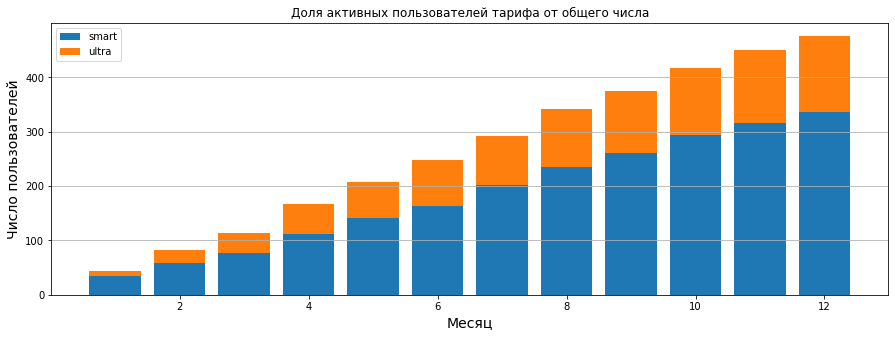

In [33]:
# Разделим пользователей по тарифам. Доля пользователей тарифа от общего числа.
plt.figure(figsize=(15, 5))
plt.bar(
    user_tot.query('tariff =="smart"').groupby('month').agg({'tariff':'count'}).reset_index()['month'],
    user_tot.query('tariff =="smart"').groupby('month').agg({'tariff':'count'}).reset_index()['tariff'],
    label='smart'
    )
plt.bar(
    user_tot.query('tariff =="ultra"').groupby('month').agg({'tariff':'count'}).reset_index()['month'],
    user_tot.query('tariff =="ultra"').groupby('month').agg({'tariff':'count'}).reset_index()['tariff'],
    bottom = user_tot.query('tariff =="smart"').groupby('month').agg({'tariff':'count'}).reset_index()['tariff'],
    label='ultra'
    )
plt.title(f'Доля активных пользователей тарифа от общего числа')
plt.xlabel("Месяц", fontsize=14)
plt.ylabel("Число пользователей", fontsize=14)
plt.grid(axis='y')
plt.legend()
plt.show()

In [34]:
# абсолютное и относичельное число активных пользователей по месяцам 
tm4 = user_tot.pivot_table(index='month', columns='tariff', values='user_id', aggfunc='count').reset_index()
tm4['total_usr'] = tm4['smart'] + tm4['ultra']
tm4['smatr_ration'] = round(tm4['smart'] / tm4['total_usr'], 2)
tm4['ultra_ration'] = 1 - tm4['smatr_ration']
tm4

tariff,month,smart,ultra,total_usr,smatr_ration,ultra_ration
0,1,34,9,43,0.79,0.21
1,2,58,24,82,0.71,0.29
2,3,77,37,114,0.68,0.32
3,4,112,55,167,0.67,0.33
4,5,141,67,208,0.68,0.32
5,6,164,84,248,0.66,0.34
6,7,201,91,292,0.69,0.31
7,8,235,107,342,0.69,0.31
8,9,260,115,375,0.69,0.31
9,10,294,123,417,0.71,0.29


Доля клиентов тарифа ultra примерно одинакова, минимальна в начале 21%, максимальна в мае - 34%, остальные месяца 29-33%

### Средние значения потребленных услуг по тарифам и месяцам

In [35]:
# Посмотрим на средние
# Среднее число вызовов, продолжительности, числа сообщенийй и трафика по тарифам в месяц
(user_tot.pivot_table(
    index=['month', 'tariff'], 
    values=['cal_no', 'cal_dur', 'msg_no', 'gb_used'], 
    aggfunc={'mean'})
    .applymap('{:.2f}'.format)
)

cal_dur cal_no gb_used msg_no
                mean   mean    mean   mean
month tariff                              
1     smart   203.85  27.68    8.74  18.24
      ultra   428.11  59.44   13.22  33.78
2     smart   298.69  40.19   11.84  24.09
      ultra   297.12  41.54   12.00  21.96
3     smart   390.05  54.32   15.23  31.86
      ultra   489.65  67.68   17.65  32.30
4     smart   367.13  51.31   13.62  30.74
      ultra   458.02  64.09   16.96  31.56
5     smart   387.36  55.24   15.91  33.77
      ultra   510.33  72.51   19.37  37.85
6     smart   395.64  55.55   15.95  33.40
      ultra   479.70  66.74   18.94  41.73
7     smart   408.35  56.73   15.88  33.75
      ultra   545.79  75.78   20.51  49.85
8     smart   421.47  58.98   16.74  33.64
      ultra   510.78  71.29   19.60  48.44
9     smart   428.61  59.55   16.39  33.64
      ultra   539.44  74.60   19.24  52.29
10    smart   426.14  59.96   16.88  33.77
      ultra   558.08  77.37   20.07  58.43
11    smart   435.27  61.50   17.00  34.08
      ultra   541.38  75.12   19.81  55.79
12    smart   478.56  66.49   18.20  35.99
      ultra   592.81  83.32   21.74  60.61

Визуализируем

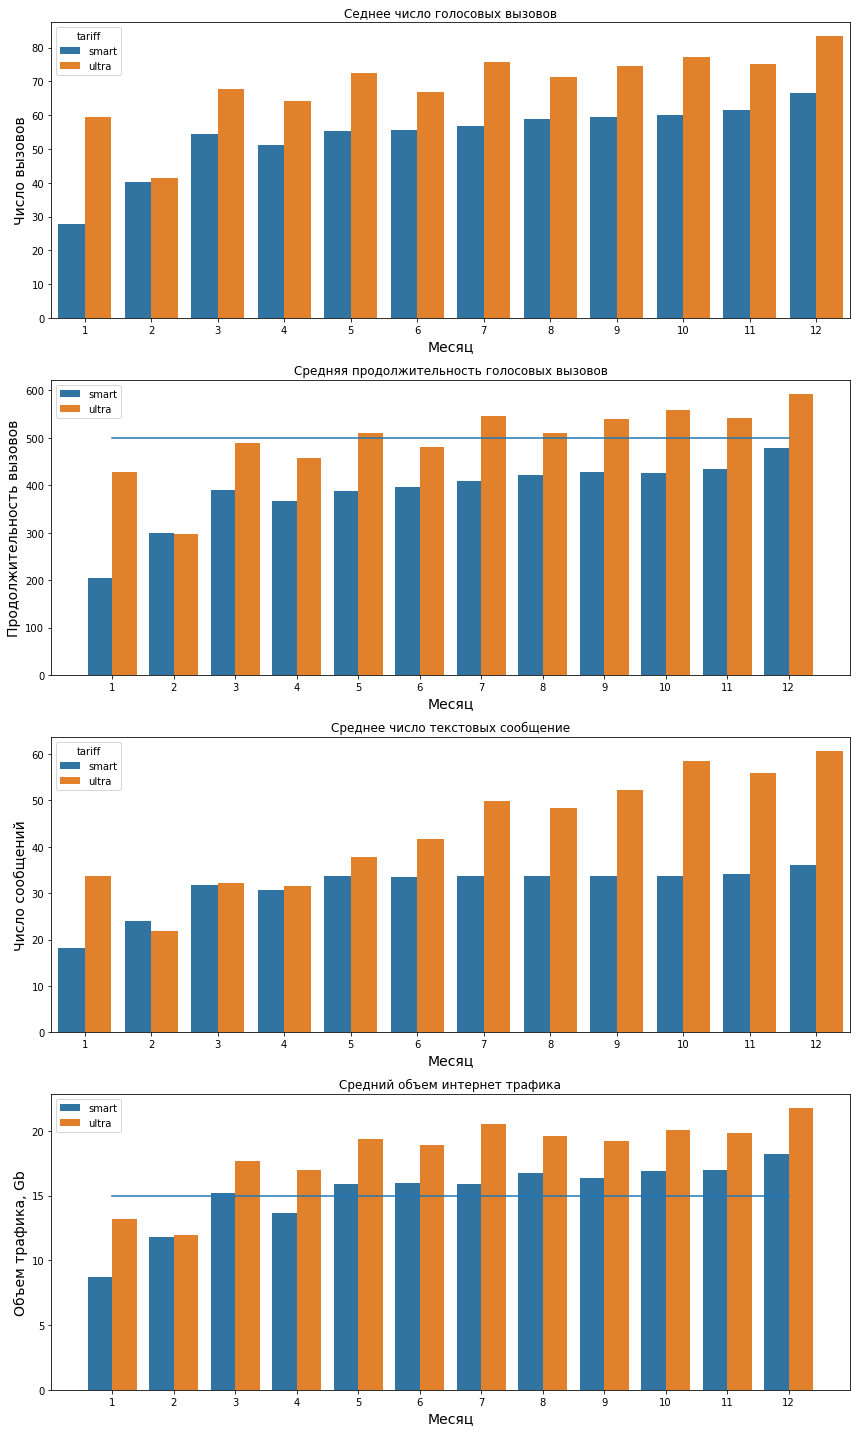

In [36]:
tm5 = (user_tot.pivot_table(
    index=['month', 'tariff'], 
    values=['cal_no', 'cal_dur', 'msg_no', 'gb_used'], 
    aggfunc={'mean'})
    .reset_index().droplevel(level=1, axis=1))

fig4 = plt.figure(figsize=(12,20))
ax1 = fig4.add_subplot(4,1,1)
ax2 = fig4.add_subplot(4,1,2)
ax3 = fig4.add_subplot(4,1,3)
ax4 = fig4.add_subplot(4,1,4)

sns.barplot(x="month", y="cal_no", data=tm5, hue='tariff', ax = ax1)
ax1.set_title('Седнее число голосовых вызовов')
ax1.set_xlabel("Месяц", fontsize=14)
ax1.set_ylabel("Число вызовов", fontsize=14)

sns.barplot(x="month", y="cal_dur", data=tm5, hue='tariff', ax = ax2)
sns.lineplot(x=[x for x in range(12)], y=500, ax = ax2) # покажем порог оплаты для smart
ax2.set_title('Средняя продолжительность голосовых вызовов')
ax2.set_xlabel("Месяц", fontsize=14)
ax2.set_ylabel("Продолжительность вызовов", fontsize=14)


sns.barplot(x="month", y="msg_no", data=tm5, hue='tariff', ax = ax3)
ax3.set_title('Среднее число текстовых сообщение')
ax3.set_xlabel("Месяц", fontsize=14)
ax3.set_ylabel("Число сообщений", fontsize=14)


sns.barplot(x="month", y="gb_used", data=tm5, hue='tariff', ax = ax4)
sns.lineplot(x=[x for x in range(12)], y=15, ax = ax4) # покажем порог оплаты для smart
ax4.set_title('Средний объем интернет трафика')
ax4.set_xlabel("Месяц", fontsize=14)
ax4.set_ylabel("Объем трафика, Gb", fontsize=14)

fig4.tight_layout()

Среднее число голосовых вызовов не является показательным. На их онвании трудно делать какие-то выводы. Ожидаемо, число вызовов у клиентов тарифа ultra выше.  
Показательно, что средняя продолжительность вызовов в декабре, для клиентов smart, чуть ниже лимита тарифа. Это говорит о том, что значительное число клиентов тарифа превышает лимит.  
Среднее число текстовых сообщение по обоим тарифам так же ниже лимита. Для клиентов smart, начиная с мая оно примерно одинаково, в районе 40 (при лимите 50). Это даёт основание полагать, что существует группа клиентов превыщающая лимит.  
По дианрамме со средним объемам трафика можно с уверенность говорить, что, как минимум в 9 месяцах, клиенты smart превышают лимит.  
Для подтверждения предположений выше, посмотрим на распределение значений по тарифам и месяцам

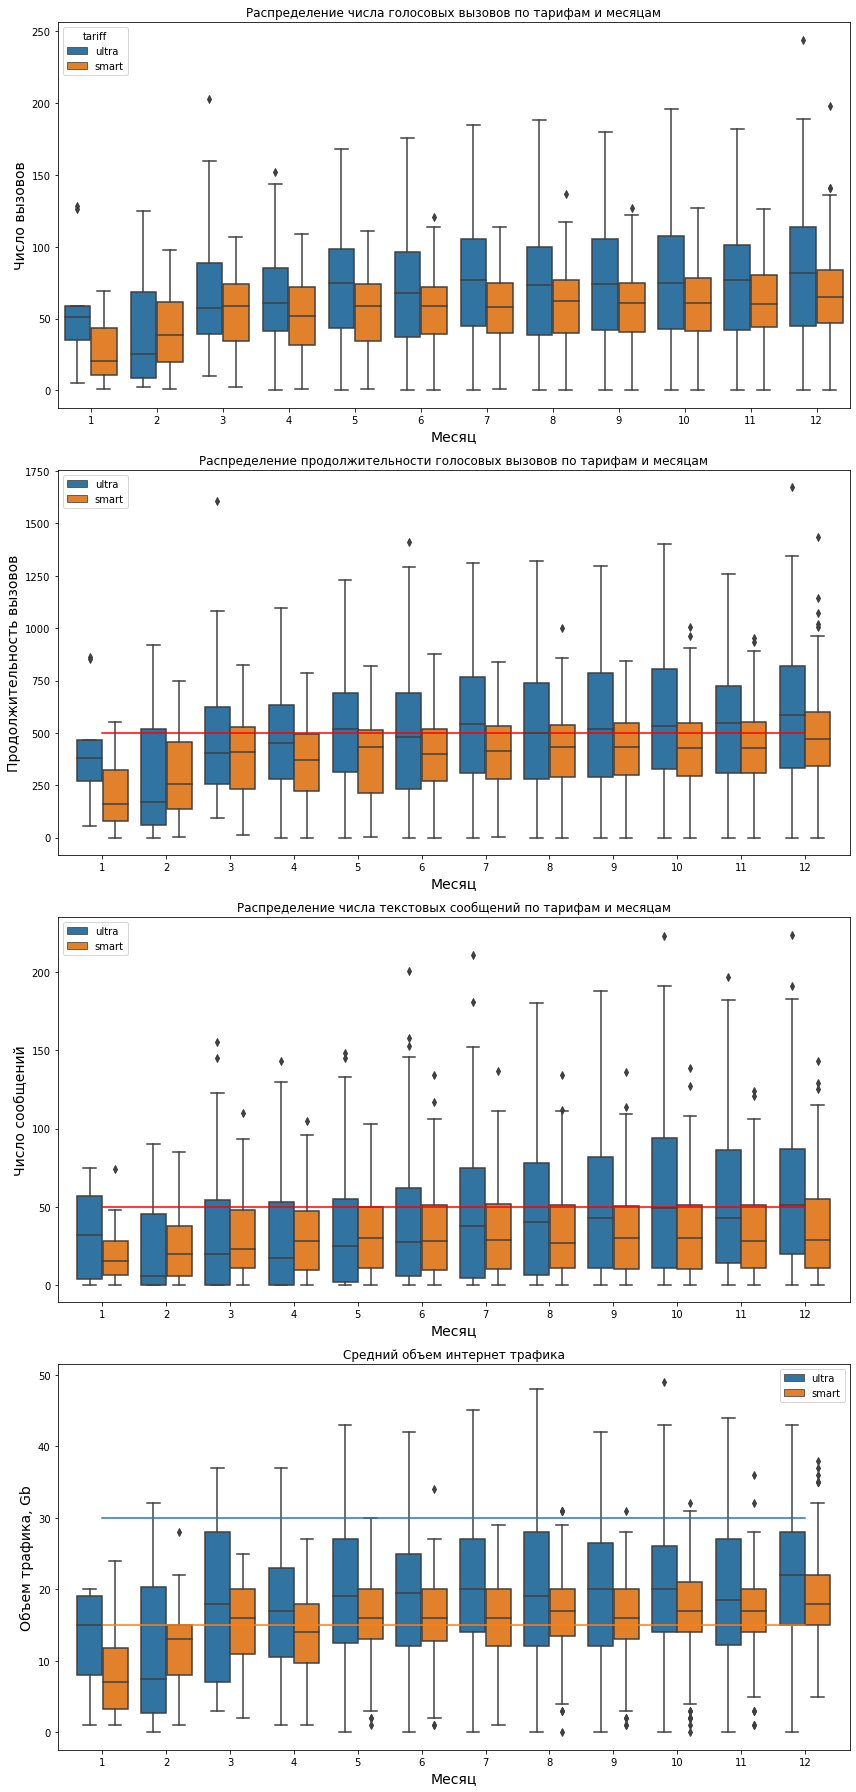

In [37]:
fig4 = plt.figure(figsize=(12,25))
ax1 = fig4.add_subplot(4,1,1)
ax2 = fig4.add_subplot(4,1,2)
ax3 = fig4.add_subplot(4,1,3)
ax4 = fig4.add_subplot(4,1,4)


sns.boxplot(x='month', y='cal_no', data=user_tot, hue='tariff', ax = ax1)
ax1.set_title('Распределение числа голосовых вызовов по тарифам и месяцам')
ax1.set_xlabel("Месяц", fontsize=14)
ax1.set_ylabel("Число вызовов", fontsize=14)


sns.boxplot(x='month', y='cal_dur', data=user_tot, hue='tariff', ax = ax2)
# добавим число включенных в пакет минут
# для тарифа smart - 500, для ultra - 3000
# предварительный анализ показал, что маклимальное число сообщений не превышает 1750
# поэтому, добавим на график только число для smart
sns.lineplot(x=[x for x in range(12)], y=500, ax = ax2, color='red')
ax2.set_title('Распределение продолжительности голосовых вызовов по тарифам и месяцам')
ax2.set_xlabel("Месяц", fontsize=14)
ax2.set_ylabel("Продолжительность вызовов", fontsize=14)

sns.boxplot(x='month', y='msg_no', data=user_tot, hue='tariff', ax = ax3)
# добавим число включенных в пакет сообщений
# для тарифа smart - 50, для ultra - 1000
# предварительный анализ показал, что маклимальное число сообщений не превышает 300
# поэтому, добавим на график только число для smart
sns.lineplot(x=[x for x in range(12)], y=50, ax = ax3, color='red')
ax3.set_title('Распределение числа текстовых сообщений по тарифам и месяцам')
ax3.set_xlabel("Месяц", fontsize=14)
ax3.set_ylabel("Число сообщений", fontsize=14)

sns.boxplot(x='month', y='gb_used', data=user_tot, hue='tariff', ax = ax4)
sns.lineplot(x=[x for x in range(12)], y=30, ax = ax4)
sns.lineplot(x=[x for x in range(12)], y=15, ax = ax4)
ax4.set_title('Средний объем интернет трафика')
ax4.set_xlabel("Месяц", fontsize=14)
ax4.set_ylabel("Объем трафика, Gb", fontsize=14)

fig4.tight_layout()

Предположения высказанные выше подтвердились. Хуже всего обстоят дела, т.е. значительное превышение лимита на тарифе smart, по услуге "мобильный интернет". Наихудший показаль по декабрю. Тут только порядка 25% клиентов уложились в лимит. В 9 из 12 месяцев, более 50% клиентов превышают лимит.  
Так же по этой услуге есть превышение лимина на тарифе ultra, но оно не так значительно. Как миниму, 75% клиентов всегда укладывались в лимит. Значения по тарифу ultra имеют более широкий размах.

Таким образом, превышения лимита имеет место:  
- по тарифу ultra только по услуге "мобильный интернет"
- по тарифу smart - по всем услугам

### Затраты клиентов по тарифам и месяцам

Посмотрим на респределение затрат клиентов

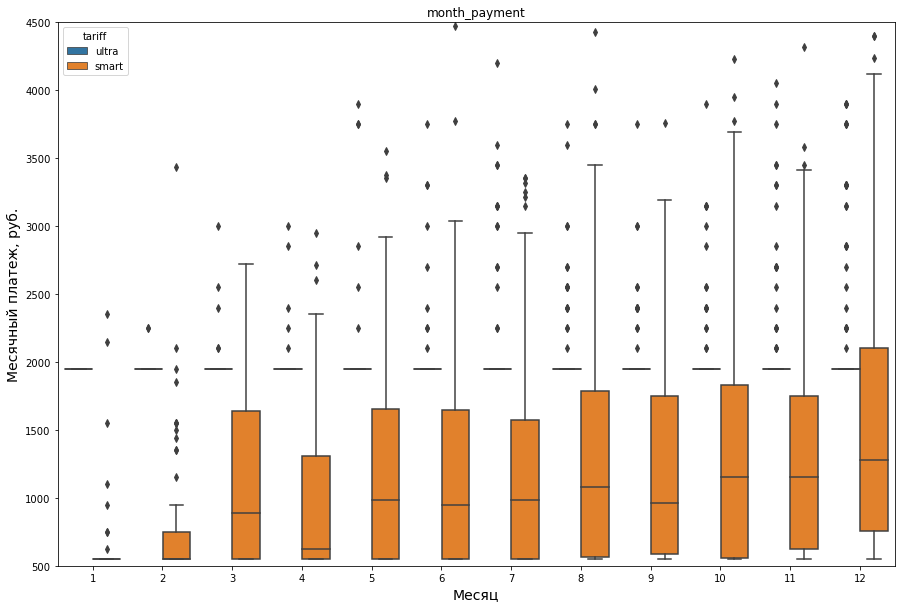

In [38]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='month', y='month_payment', data=user_tot, hue='tariff')
# зададим диапазон по оси у, принимая во внимание стоимоть тарифов 550 и 1950
plt.ylim(500, 4500)
plt.title('month_payment')
plt.xlabel("Месяц", fontsize=14)
plt.ylabel("Месячный платеж, руб.", fontsize=14)
plt.show()

* Тариф "ultra" - в основном клиентам хватает включенных в тариф услуг.  
* Тариф "smart" - уже со второго месяца около 50% клиентов превышают объем включенных услуг. Дальше показатель только растёт и к концну года: менее 25% укладываются в стоимость тарифа (550руб); более 50% клиентов платят больше 1000руб.

In [39]:
# Для справки посмотрим на Топ-5 самых прибыльных клиентов для каждого из тарифов
print("")
print("Самые прибыльные клиенты тарифа SMART")
display(user_tot.query('tariff == "smart"').sort_values(by='month_payment', ascending = False).head())
print("")
print("Самые прибыльные клиенты тарифа ULTRA")
display(user_tot.query('tariff == "ultra"').sort_values(by='month_payment', ascending = False).head())


Самые прибыльные клиенты тарифа SMART


,user_id,month,cal_no,cal_dur,msg_no,gb_used,tariff,month_payment
3106,1486,12,133.0,1007.0,83.0,38.0,smart,6770.0
260,1042,12,121.0,728.0,75.0,37.0,smart,5709.0
3105,1486,11,108.0,764.0,96.0,36.0,smart,5680.0
1622,1261,12,141.0,1074.0,22.0,32.0,smart,5672.0
1793,1286,12,95.0,739.0,68.0,35.0,smart,5321.0



Самые прибыльные клиенты тарифа ULTRA


,user_id,month,cal_no,cal_dur,msg_no,gb_used,tariff,month_payment
782,1124,10,152.0,1225.0,121.0,49.0,ultra,4800.0
1499,1240,8,54.0,457.0,0.0,48.0,ultra,4650.0
1597,1255,7,37.0,263.0,0.0,45.0,ultra,4200.0
1884,1300,11,88.0,658.0,170.0,44.0,ultra,4050.0
2393,1380,12,104.0,735.0,30.0,43.0,ultra,3900.0


Похоже, что клиент 1486 дважды попавший в Топ-3, явно ошибся с выбором тарифа.

### Средняя и общая выручки по тарифам

In [40]:
# Посмотрим средние значения для каждой из услуг по каждому тарифу за год
print('Средние значения')
display(
user_tot.groupby('tariff')
    .agg({
         'cal_no':'mean',
         'cal_dur': 'mean',
         'msg_no': 'mean',
         'gb_used': 'mean',
         'month_payment': 'mean'})
    .applymap('{:.2f}'.format)
)
print()
# Выручка по тарифам за год
print('Выручка по тарифам за год')
display(user_tot.groupby('tariff').agg({'month_payment': 'sum'}))

Средние значения


,cal_no,cal_dur,msg_no,gb_used,month_payment
tariff,,,,,
smart,58.46,417.93,33.38,16.33,1289.97
ultra,73.39,526.62,49.36,19.49,2070.15



Выручка по тарифам за год


,month_payment
tariff,
smart,2875351.0
ultra,2039100.0


Cильное различие во всех показателях кроме интернета. Даже среднее по smart превышает лимит в 15gb  
Общая годовая выручка по smart больше, но в расчёте на клиента лидирует ultra.

### Распределения и основные статистические показатели

Построим гистограммы для этих показателей

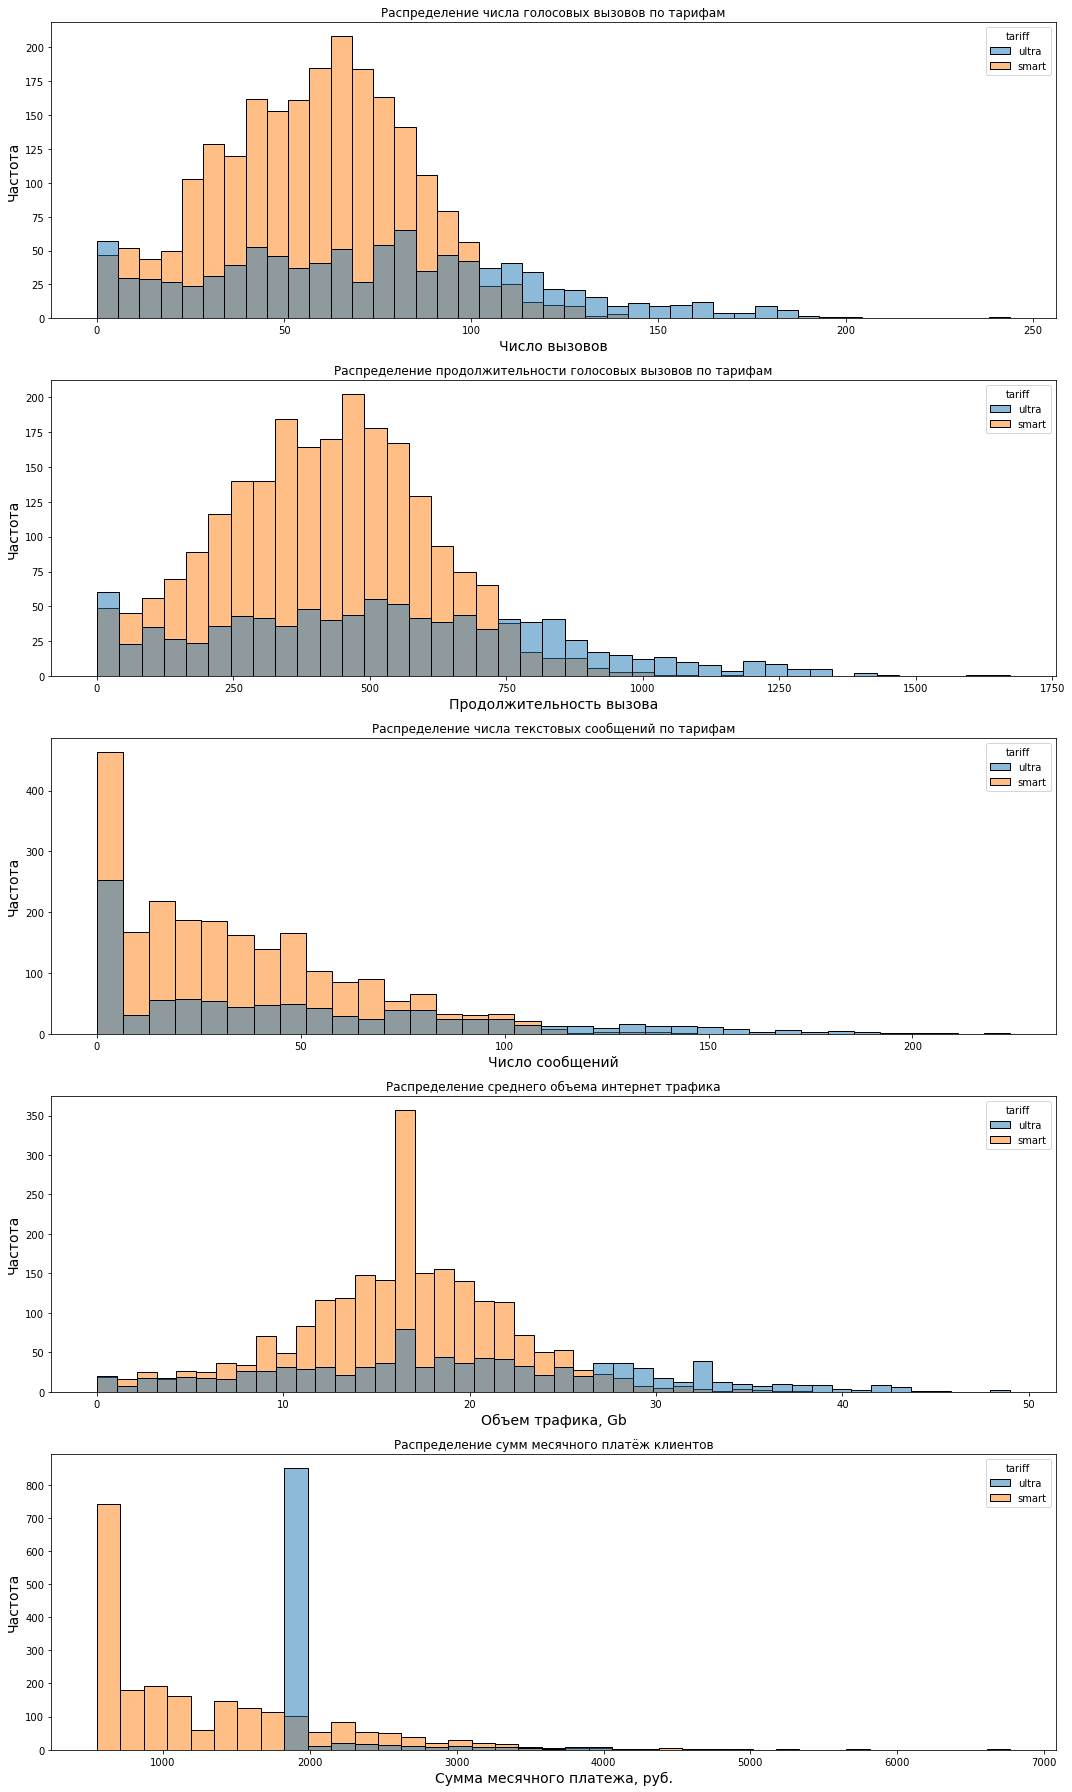

In [41]:
fig4 = plt.figure(figsize=(15,25))
ax1 = fig4.add_subplot(5,1,1)
ax2 = fig4.add_subplot(5,1,2)
ax3 = fig4.add_subplot(5,1,3)
ax4 = fig4.add_subplot(5,1,4)
ax5 = fig4.add_subplot(5,1,5)

sns.histplot(x='cal_no', data=user_tot, hue='tariff', ax = ax1)
ax1.set_title('Распределение числа голосовых вызовов по тарифам')
ax1.set_xlabel("Число вызовов", fontsize=14)
ax1.set_ylabel("Частота", fontsize=14)

sns.histplot(x='cal_dur', data=user_tot, hue='tariff', ax = ax2)
ax2.set_title('Распределение продолжительности голосовых вызовов по тарифам')
ax2.set_xlabel("Продолжительность вызова", fontsize=14)
ax2.set_ylabel("Частота", fontsize=14)

sns.histplot(x='msg_no', data=user_tot, hue='tariff', ax = ax3)
ax3.set_title('Распределение числа текстовых сообщений по тарифам')
ax3.set_xlabel("Число сообщений", fontsize=14)
ax3.set_ylabel("Частота", fontsize=14)

sns.histplot(x='gb_used', data=user_tot, hue='tariff', ax = ax4)
ax4.set_title('Распределение среднего объема интернет трафика')
ax4.set_xlabel("Объем трафика, Gb", fontsize=14)
ax4.set_ylabel("Частота", fontsize=14)

sns.histplot(x='month_payment', data=user_tot, hue='tariff', ax = ax5)
ax5.set_title('Распределение сумм месячного платёж клиентов')
ax5.set_xlabel("Сумма месячного платежа, руб.", fontsize=14)
ax5.set_ylabel("Частота", fontsize=14)

fig4.tight_layout()

Посмотрим на основные характеричстики

In [42]:
print('Для тарифа SMART')
display(user_tot.loc[user_tot['tariff'] == 'smart']
    .loc[:, ['cal_dur', 'msg_no', 'gb_used', 'month_payment']]
    .describe()
    .applymap("{0:.2f}".format)) 
print('')
print('Для тарифа ULTRA')
display(user_tot.loc[user_tot['tariff'] == 'ultra']
    .loc[:, ['cal_dur', 'msg_no', 'gb_used', 'month_payment']]
    .describe()
    .applymap("{0:.2f}".format)) 

Для тарифа SMART


,cal_dur,msg_no,gb_used,month_payment
count,2229.00,2229.00,2229.00,2229.00
mean,417.93,33.38,16.33,1289.97
std,190.31,28.23,5.75,818.40
min,0.00,0.00,0.00,550.00
25%,282.00,10.00,13.00,550.00
50%,422.00,28.00,17.00,1023.00
75%,545.00,51.00,20.00,1750.00
max,1435.00,143.00,38.00,6770.00



Для тарифа ULTRA


,cal_dur,msg_no,gb_used,month_payment
count,985.00,985.00,985.00,985.00
mean,526.62,49.36,19.49,2070.15
std,317.61,47.80,9.85,376.19
min,0.00,0.00,0.00,1950.00
25%,284.00,6.00,12.00,1950.00
50%,518.00,38.00,19.00,1950.00
75%,752.00,79.00,27.00,1950.00
max,1673.00,224.00,49.00,4800.00


In [43]:
print('Дисперсии для тарифа SMART')
display(user_tot.loc[user_tot['tariff'] == 'smart']
    .loc[:, ['cal_dur', 'msg_no', 'gb_used', 'month_payment']]
    .var()
    .map("{0:.2f}".format))
print('')
print('Дисперсии для тарифа ULTRA')
display(user_tot.loc[user_tot['tariff'] == 'ultra']
    .loc[:, ['cal_dur', 'msg_no', 'gb_used', 'month_payment']]
    .var()
    .map("{0:.2f}".format))    

Дисперсии для тарифа SMART


cal_dur           36219.32
msg_no              796.81
gb_used              33.03
month_payment    669785.71
dtype: object


Дисперсии для тарифа ULTRA


cal_dur          100873.63
msg_no             2285.27
gb_used              97.09
month_payment    141516.75
dtype: object

In [44]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


**Выводы**  

Распределение клиентов по тарифам: SMART 70%, ULTRA 30%

Особенности клиентов тарифа SMART:
  - голосовые вызовы: более 25% превышают лимит
  - текстовые сообщения: более 25% превышают лимит
  - мобильный интернет: более 50% превышают лимит
  - размер ежемесячного платежа: менее 50% укладываются в стоимость тарифа (550руб), более 50% клиентов платят больше 1000руб. максимальный платёж превышает стоимость тарифа в 12 раз.
  
Особенности клиентов тарифа ULTRA:
  - голосовые вызовы: 100% без превышения
  - текстовые сообщения: 100% без превышения
  - мобильный интернет: 75% без превышения
  - размер ежемесячного платежа: большинство клиентов (около 75%) как правило, обходятся без дополнительных птатежей. максимальный платёж превышает стоимость тарифа в 2.5 раза.  

Таким образом, превышения лимита имеет место:
  - по тарифу ultra только по услуге "мобильный интернет" (менее 25% клиентов)
  - по тарифу smart - по всем услугам (около 75% клиентов)

Общая годовая выручка по smart больше, но в расчёте на клиента выручка ultra больше в 1.6 раза.

## Проверка гипотезы

Для проверки гипотез ниже, примем уровень значимости 5%

In [45]:
alpha = .05

### Гипотеза о равенстве выручки

**Нулевая и альтернативная гипотезы**  
Н0: средняя выручка пользователей тарифов «Ультра» и «Смарт» равны;  
НА: средняя выручка пользователей тарифов «Ультра» и «Смарт» не равны (различаются)

In [46]:
results = stats.ttest_ind(
    user_tot.query('tariff == "smart"')['month_payment'],
    user_tot.query('tariff == "ultra"')['month_payment'],
    equal_var=False)
print('p-значение', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение 4.2606313931076085e-250
Отвергаем нулевую гипотезу


p-значение ничножно мало по сравнению с принятым уровнем значимости. Поэтому, гипотезу, что средняя выручка пользователей тарифов «Ультра» и «Смарт» равны отвергаем. 

### Гипотеза о равенстве выручки Москвы и других регионов

Добавим в таблицу город клиента, присоединив данные таблицы users к таблице user_tot

In [47]:
# слияние таблиц
user_tot_city = user_tot.merge(users.loc[:, ['user_id', 'city']], on='user_id', how='left')
# заменим название всех городов кроме Москвы на "Не Москва"
user_tot_city['city'] = user_tot_city['city'].apply(lambda x: 'Москва' if x == 'Москва' else 'Не Москва')
# проверка
user_tot_city.sample(5)

,user_id,month,cal_no,cal_dur,msg_no,gb_used,tariff,month_payment,city
2572,1404,11,39.0,226.0,59.0,18.0,smart,1177.0,Не Москва
1820,1291,8,77.0,487.0,0.0,13.0,smart,550.0,Москва
866,1142,4,67.0,475.0,24.0,22.0,smart,1950.0,Не Москва
1392,1221,7,20.0,114.0,32.0,9.0,smart,550.0,Не Москва
1870,1299,3,82.0,714.0,38.0,22.0,smart,2592.0,Не Москва


**Нулевая и альтернативная гипотезы**  
Н0: средняя выручка пользователей Москвы и других регионов равны;  
НА: средняя выручка пользователей Москвы и других регионов не равны (различаются)

Проверку гипотез будем проводить для каждого из тарифов

In [48]:
results = stats.ttest_ind(
    user_tot_city.query('tariff == "smart" & city == "Москва"')['month_payment'],
    user_tot_city.query('tariff == "smart" & city == "Не Москва"')['month_payment'],
    equal_var=False)
print('Для тарифа SMART')
print('p-значение', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

Для тарифа SMART
p-значение 0.15468343176376667
Не получилось отвергнуть нулевую гипотезу


In [49]:
results = stats.ttest_ind(
    user_tot_city.query('tariff == "ultra" & city == "Москва"')['month_payment'],
    user_tot_city.query('tariff == "ultra" & city == "Не Москва"')['month_payment'],
    equal_var=False)
print('Для тарифа ULTRA')
print('p-значение', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

Для тарифа ULTRA
p-значение 0.8544997530689904
Не получилось отвергнуть нулевую гипотезу


Гипотезу о равенстве средней выручки пользователей Москвы и других регионов не удалось отвергнуть для обоих тарифов. Более того, видно что даже при уровне значимости 1% результат не изменится.

## Выводы и рекомендации

*Выводы по услугам:*
- Линейный рост числа пользователей по услугам
- Сходная динамика прироста числа пользователей по услугам. Худшая динамина по текстовым сообщениям
- Нельзя утверждать что клиенты отказываются от голосовых вызовов и текстовых сообщений в пользу мобильного интернета (мессенджеров)
- Объемы всех услуг в расчете на одного пользователя растут
- Почти линейтый рост выручки по каждому из тарифов. По smart прирост больше. Разрыв межу тарифами увеличивается (от ~25К руб. в июне, до ~230К в декабре.)


*Выводы по тарифам:*

Распределение клиентов по тарифам: SMART 70%, ULTRA 30%

Особенности клиентов тарифа SMART:
  - голосовые вызовы: более 25% превышают лимит
  - текстовые сообщения: более 25% превышают лимит
  - мобильный интернет: более 50% превышают лимит
  - размер ежемесячного платежа: менее 50% укладываются в стоимость тарифа (550руб), более 50% клиентов платят больше 1000руб. максимальный платёж превышает стоимость тарифа в 12 раз.
  
Особенности клиентов тарифа ULTRA:
  - голосовые вызовы: 100% без превышения
  - текстовые сообщения: 100% без превышения
  - мобильный интернет: 75% без превышения
  - размер ежемесячного платежа: большинство клиентов (около 75%) как правило, обходятся без дополнительных птатежей. максимальный платёж превышает стоимость тарифа в 2.5 раза.  

Таким образом, превышения лимита имеет место:
  - по тарифу ultra только по услуге "мобильный интернет" (менее 25% клиентов)
  - по тарифу smart - по всем услугам (около 75% клиентов)
  
Общая годовая выручка по smart больше, но в расчёте на клиента выручка ultra больше в 1.6 раза.
В среднем, выручка с одного клиента тарифа ultra в 1.6 раза выше. Клиентов тарифа smatr больше более чем в 2 раза. Это даёт основание предполагать, что стоимость привлечения клиента на тариф smart ниже, чем на тариф ultra. Таким образом, при одинаковых затратах на рекламную компанию, в случае smart будет привлечено в 2-3 раза больше клиентов. Это даст большуб общую выручку компании.  
**Проверка гипотезы о равенстве выручки Москвы и других регионов и изложенные выше пояснения, дают основание рекомедовать федеральное промо тарифа smart.**
